In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, confusion_matrix
%matplotlib inline

In [2]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [3]:
df = pd.read_csv("hack/app_review_rating_train.csv")

/Users/Dmitry/anaconda3/envs/data_Science_test/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


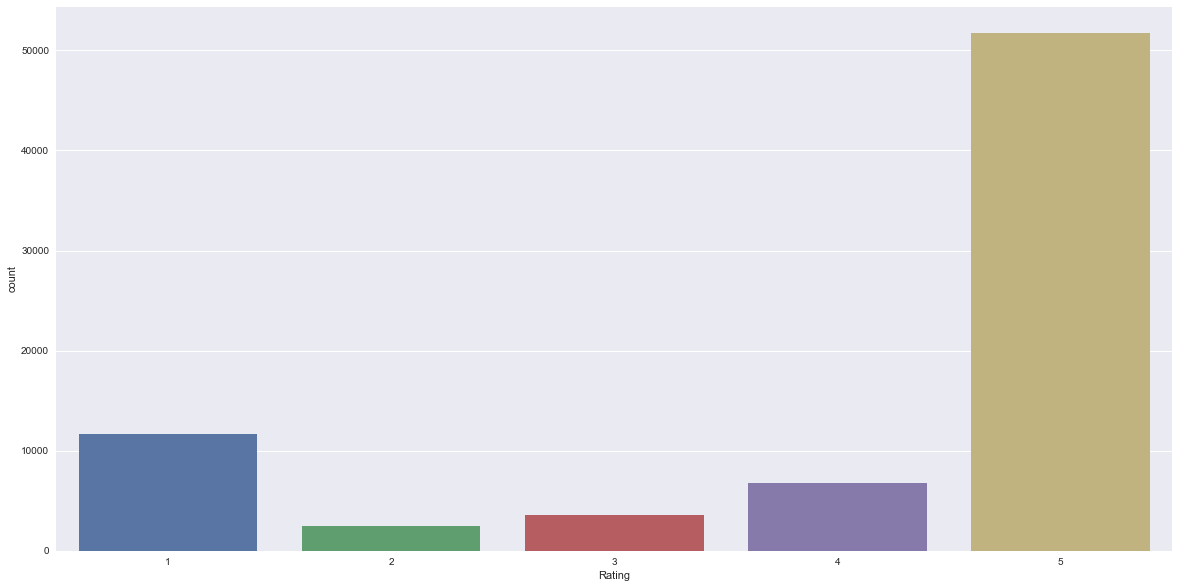

In [4]:
sns.countplot(data=df, x='Rating')

In [5]:
df['Rating'].value_counts()

5    51730
1    11696
4     6769
3     3616
2     2470
Name: Rating, dtype: int64

In [6]:
df.head()

,Date,AppName,Language,Version,Rating,Title,Review
0,2017-11-06,Сбербанк Онлайн,ru,8.3.0,3,Вылетает исправьте,После очередного обновления не работает вылета...
1,2017-06-23,Сбербанк Онлайн,ru,8.1.0,5,Очень удобно!,"МЕГА удобно и функционально, все отлично работ..."
2,2017-04-12,Сбербанк Онлайн,ru,8.0.2,3,Бесконтактная оплата,Добавьте VISA PAY!!!!!!
3,2017-07-29,Сбербанк Онлайн,ru,8.1.0,5,Все работает без проблем.,Все хорошо
4,2016-11-28,Сбербанк Онлайн,ru,7.4.4,5,Круто мне нравится ?,Круто удобная связь?


Объединим колонки с отзывом и заголовком, чтобы получить больше информации

In [7]:
df['Review'] = df['Review'].astype(str)
df['Title'] = df['Title'].astype(str)

df['Text'] = df['Review'] + " " + df['Title']

In [8]:
df = df.drop(['Title', 'Review', 'Version', 'Language', 'AppName', 'Date'], 1)

In [9]:
df.head()

,Rating,Text
0,3,После очередного обновления не работает вылета...
1,5,"МЕГА удобно и функционально, все отлично работ..."
2,3,Добавьте VISA PAY!!!!!! Бесконтактная оплата
3,5,Все хорошо Все работает без проблем.
4,5,Круто удобная связь? Круто мне нравится ?


## Обработка текстовых данных

Препроцессинг отзывов

In [10]:
df['Text'] = df['Text'].apply(lambda t: ' '.join(CountVectorizer().build_tokenizer()(t.lower())))

Удаляем стоп-слова

In [11]:
stop_words = set(stopwords.words("russian"))
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

## Создание TF-IDF матрицы

In [12]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors = vectorizer.fit_transform(df['Text'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(vectors, df['Rating'], test_size=0.33, random_state=42)

In [14]:
# initialise the SVM classifier
classifier = LinearSVC(class_weight='balanced')
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [15]:
preds = classifier.predict(X_test)

In [16]:
accuracy_score(y_true=y_test, y_pred=preds)

0.79263496603503758

In [18]:
print(classification_report(y_true=y_test, y_pred=preds))

             precision    recall  f1-score   support

          1       0.66      0.79      0.72      3883
          2       0.12      0.05      0.07       805
          3       0.25      0.18      0.21      1165
          4       0.38      0.27      0.31      2259
          5       0.90      0.94      0.92     17061

avg / total       0.76      0.79      0.78     25173



In [21]:
print(precision_recall_fscore_support(y_true=y_test, y_pred=preds, average='macro'))

(0.46199952216608431, 0.44548897893483297, 0.44653347759773848, None)


In [23]:
confusion_matrix(y_true=y_test, y_pred=preds)

array([[ 3068,   151,   205,   151,   308],
       [  488,    41,    95,   100,    81],
       [  463,    57,   209,   238,   198],
       [  297,    42,   208,   604,  1108],
       [  355,    47,   112,   516, 16031]])

In [18]:
df_test = pd.read_csv("hack/app_review_rating_test.csv")
df_test['Review'] = df_test['Review'].astype(str)
df_test['Title'] = df_test['Title'].astype(str)
df_test['Text'] = df_test['Review'] + " " + df_test['Title']
df_test = df_test.drop(['Title', 'Review', 'Version', 'Language', 'AppName', 'Date'], 1)
df_test['Text'] = df_test['Text'].apply(lambda t: ' '.join(CountVectorizer().build_tokenizer()(t.lower())))
df_test['Text'] = df_test['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [19]:
vectors_test = vectorizer.transform(df_test['Text'])

In [20]:
predictions = classifier.predict(vectors_test)

In [21]:
df_test['Rating'] = predictions

In [22]:
df_test['Rating'].value_counts()

5    17231
1     4866
4     1951
3      934
2      446
Name: Rating, dtype: int64

/Users/Dmitry/anaconda3/envs/data_Science_test/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


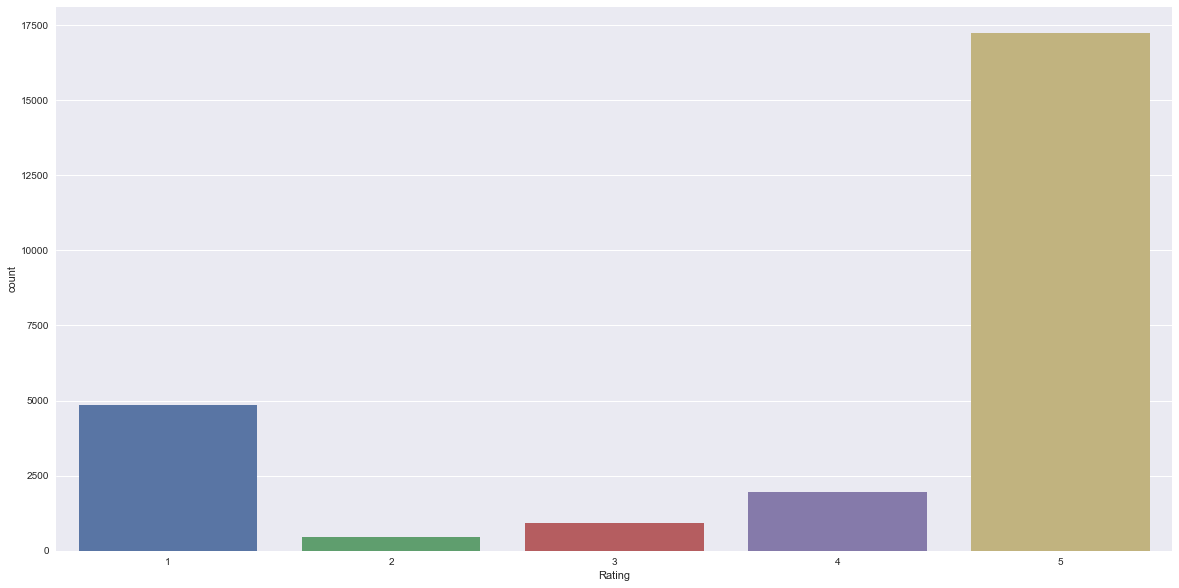

In [23]:
sns.countplot(data=df_test, x='Rating')

In [25]:
#writer = pd.ExcelWriter('output.xlsx')
#df_test.to_excel(writer,'Sheet1')
#writer.close()

In [26]:
one_r = "Невозможно совершить перевод"
lambda_1 = lambda t: ' '.join(CountVectorizer().build_tokenizer()(t.lower()))
lambda_2 = lambda x: ' '.join([word for word in x.split() if word not in (stop_words)])
one_r = lambda_1(one_r)
one_r = lambda_2(one_r)


vector_test = vectorizer.transform([one_r])
prediction = classifier.predict(vector_test)

In [27]:
prediction

array([1])

In [28]:
#from sklearn.externals import joblib
#joblib.dump(classifier, 'model_v1.pkl')

In [29]:
#joblib.dump(vectorizer, 'tfidf_matrix.pkl')